# Linear regression

$$h(x) = w_0 + w_1*x$$

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def h(w_0, w_1, x):
    return w_0 + w_1*x

In [24]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


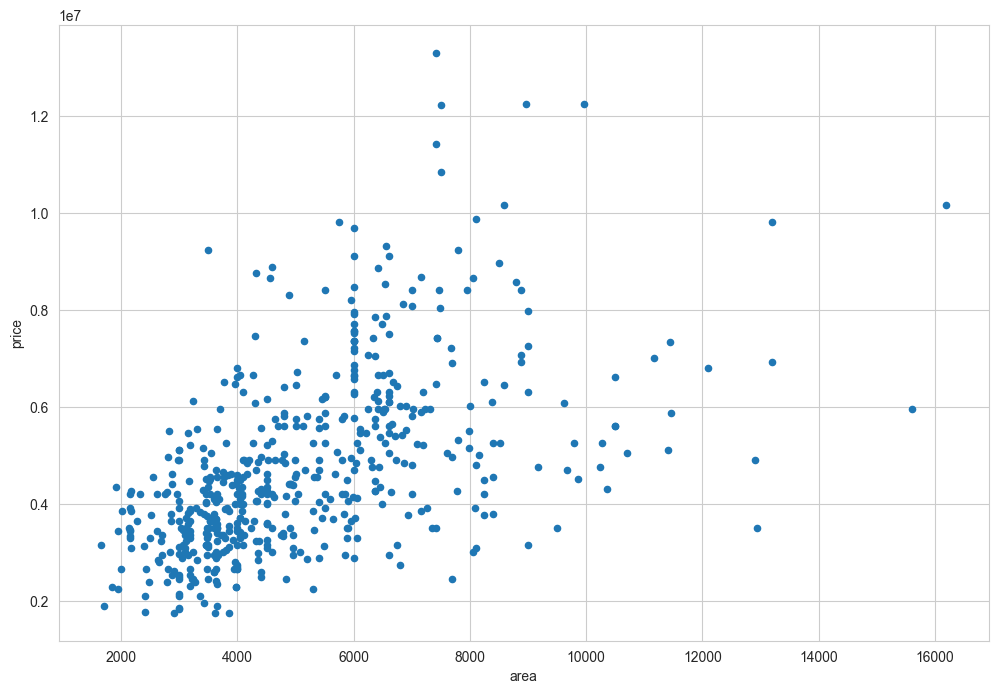

In [32]:
df.plot(x="area", y="price", kind="scatter", figsize=(12,8))
plt.show()

### Compute Loss function

In [25]:
def loss_function(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)**2
    
    return cost/(2*n)

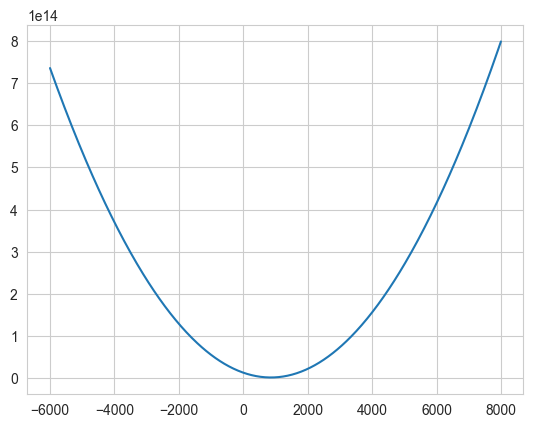

In [26]:
w_0 = 0

w_1 = np.linspace(-6000, 8000, 500)

sns.set_style("whitegrid")
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])
plt.show()

In [ ]:
grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-10000, 10000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, df)

sns.set_style("whitegrid")
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(w_0, w_1, z)
plt.show()

### Gradient decsent

In [33]:
def grad_step(weights, grads, learning_rate=0.001):

    w_0, w_1 = weights
    grad_0, grad_1 = grads

    w_0 = w_0 - learning_rate * grad_0
    w_1 = w_1 - learning_rate * grad_1
    return w_0, w_1

In [ ]:
def grad_descent(weights, df, num_iter, learning_rate=0.001, epsilon=0.01):

    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]

    for i in range(num_iter):

        loss = loss_function(w_0, w_1, df)
        # grad-s compulation
        w_0, w_1 = grad_step(weights, grads, learning_rate=learning_rate)
        weights = (w_0, w_1)

        loss_history.append(loss)